 # Time series prediction
 
 Predict kW 48 hours ahead of current time.
 
 In this data reading of meter is bi-hourly. We have to get houly reading in predictions. 
 
 For optimization, our prediction shold not be deviated more than ±5kWh.
 
 ## To Do
 
 1- Sampling (convert bi-hourly data into hourly data)
 
 2- Filling the Data (entering the missing values)
 
 3- Sorting the data timewise (Status: done) ✔️
 
 4- Analysis
 
 How to make Time_stamp indexed?

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from plt import rcParams
#rcPramas['figure.figsize'] = 10, 6
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
dataset = pd.read_csv("3098000032-Mar18-Mar19.csv")

In [3]:
dataset.head(50)

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
5,3098000032,12.460,0.090,8.428,0.084,2018-03-05 10:30:00
6,3098000032,12.575,0.230,8.459,0.062,2018-03-05 11:00:00
7,3098000032,12.681,0.212,8.477,0.036,2018-03-05 11:30:00
8,3098000032,12.890,0.418,8.512,0.070,2018-03-05 12:00:00
9,3098000032,13.082,0.384,8.546,0.068,2018-03-05 12:30:00


In [4]:
dataset.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


In [5]:
dataset.shape

(17462, 6)

In [6]:
dataset.dtypes

serial          int64
kWh           float64
kW            float64
kVARh         float64
kVAR          float64
Time_stamp     object
dtype: object

In [7]:
#For checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

dataset.kW.plot()

In [8]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kW', 'Time_stamp'])

In [9]:
#df['Time'] = pd.to_datetime(dataset.Time_stamp)

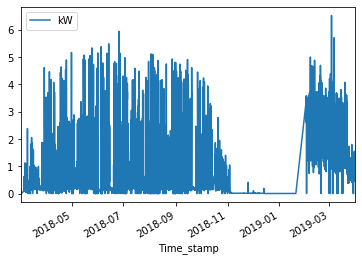

In [10]:
import matplotlib.pyplot as plt
df.plot(x='Time_stamp', y='kW', kind='line') 
plt.show()

In [12]:
#Number of time_stamp per month
df.Time_stamp.dt.month.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Time_stamp'

In [13]:
#Line plot of Number of time_stamp per month
df.Time_stamp.dt.month.value_counts().sort_index().plot()

AttributeError: 'DataFrame' object has no attribute 'Time_stamp'

In [14]:
df.Time_stamp.min()

AttributeError: 'DataFrame' object has no attribute 'Time_stamp'

In [15]:
df.Time_stamp.max()

AttributeError: 'DataFrame' object has no attribute 'Time_stamp'

In [16]:
df.loc[200:250]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [200] of <class 'int'>

## Sampling
(Under construction)

In [11]:
df.set_index('Time_stamp', inplace=True)

In [18]:
df.dtypes

kW    float64
dtype: object

In [20]:
#Sorting Time_wise

df = df.sort_values(['Time_stamp'])

In [21]:
df.shape

(17462, 1)

In [22]:
df

,kW
Time_stamp,
2018-03-01 14:30:00,0.000
2018-03-01 15:30:00,0.000
2018-03-01 16:30:00,0.138
2018-03-01 17:00:00,0.000
2018-03-02 11:30:00,0.000
...,...
2019-03-31 22:00:00,0.982
2019-03-31 22:30:00,1.040
2019-03-31 23:00:00,1.192
